In [59]:
#imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# constants
path = 'C:/Users/Asus/Documents/2023_2/Memoria/src'

red = '5F0003'
blue = '206ED5'
orange = 'F38735'

# trim bounds
lower_bound = 4464
upper_bound = 4478

# Ostar
O_df = pd.read_csv(path+'/Data/o_spectral_lines.csv')
# Bstar
B_df = pd.read_csv(path+'/Data/b_spectral_lines.csv')
# Observed spectra
Obs_df = pd.read_csv(path+'/Data/observed_spectral_lines_v2.csv')

In [33]:
# color scale
# src = https://medium.com/@BrendanArtley/matplotlib-color-gradients-21374910584b
def hex_to_RGB(hex_str):
    """ #FFFFFF -> [255,255,255]"""
    #Pass 16 to the integer function for change of base
    return [int(hex_str[i:i+2], 16) for i in range(1,6,2)]

def get_color_gradient(c1, c2, n):
    """
    Given two hex colors, returns a color gradient
    with n colors.
    """
    assert n > 1
    c1_rgb = np.array(hex_to_RGB(c1))/255
    c2_rgb = np.array(hex_to_RGB(c2))/255
    mix_pcts = [x/(n-1) for x in range(n)]
    rgb_colors = [((1-mix)*c1_rgb + (mix*c2_rgb)) for mix in mix_pcts]
    return ["#" + "".join([format(int(round(val*255)), "02x") for val in item]) for item in rgb_colors]

In [34]:
# plot line
def tendencyLine(spectra,paramValue,c):
	plt.plot([float(i) for i in spectra.keys()],spectra.values,c=c)

# 2. B-Star

## Trim Visualization

In [35]:
# dataframe setup
target = ['temperature','g','v']
x = B_df.drop(target,axis=1)
y = B_df[target]

# parametra values lists
t_list = y['temperature'].unique()
g_list = y['g'].unique()
v_list = y['v'].unique()

In [36]:
t = t_list[1]
v = y[y.temperature == t].v.min()
matchingGs = y[y.temperature == t].g.unique()

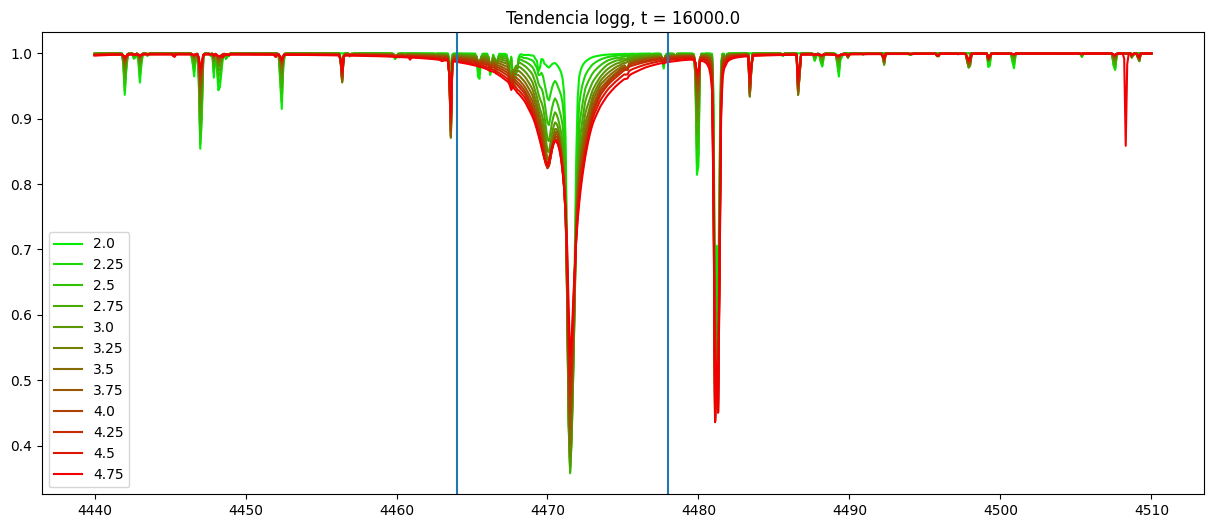

In [37]:
lower_bound = 4464
upper_bound = 4478
color = get_color_gradient(blue,red,len(matchingGs))

plt.figure(figsize=(15,6))

for i,g in enumerate(matchingGs):
  spectraIndex = y[(y.temperature == t) & (y.g == g) & (y.v == v)].index[0]
  tendencyLine(x.iloc[spectraIndex], str(int(t)),color[i])

plt.legend(matchingGs)
plt.title('Tendencia logg, t = '+str(t))
plt.axvline(x = lower_bound)
plt.axvline(x = upper_bound)
plt.show()

## Trim

In [38]:
trimList = []
for freq in x.columns:
  if float(freq) <= lower_bound or float(freq) >= upper_bound:
    trimList.append(freq)
x = x.drop(trimList,axis=1)

## Trim Result

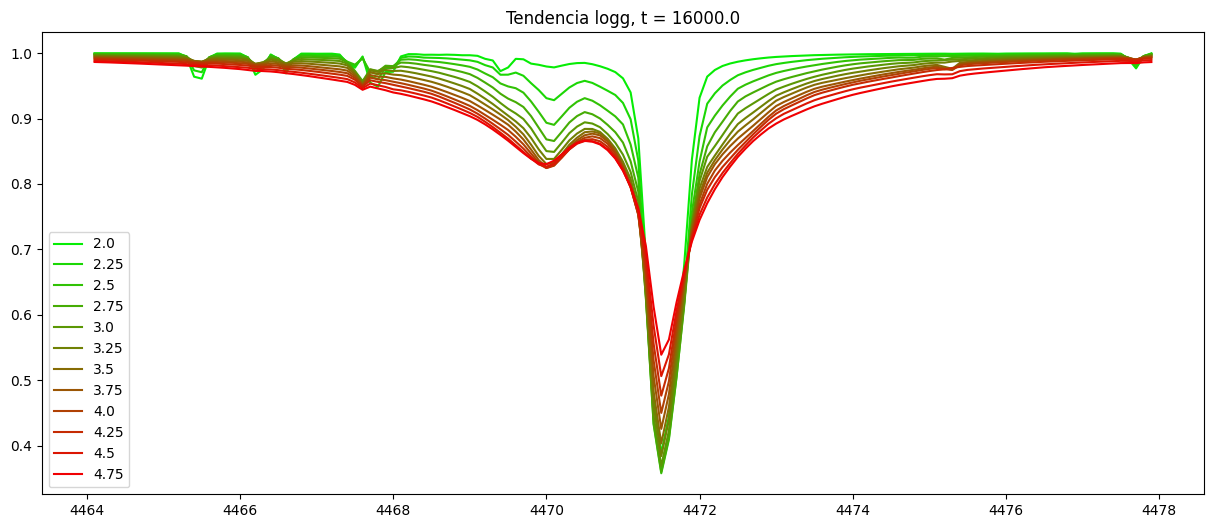

In [39]:
color = get_color_gradient(blue,red,len(matchingGs))

plt.figure(figsize=(15,6))

for i,g in enumerate(matchingGs):
  spectraIndex = y[(y.temperature == t) & (y.g == g) & (y.v == v)].index[0]
  tendencyLine(x.iloc[spectraIndex], str(int(t)),color[i])

plt.legend(matchingGs)
plt.title('Tendencia logg, t = '+str(t))
plt.show()

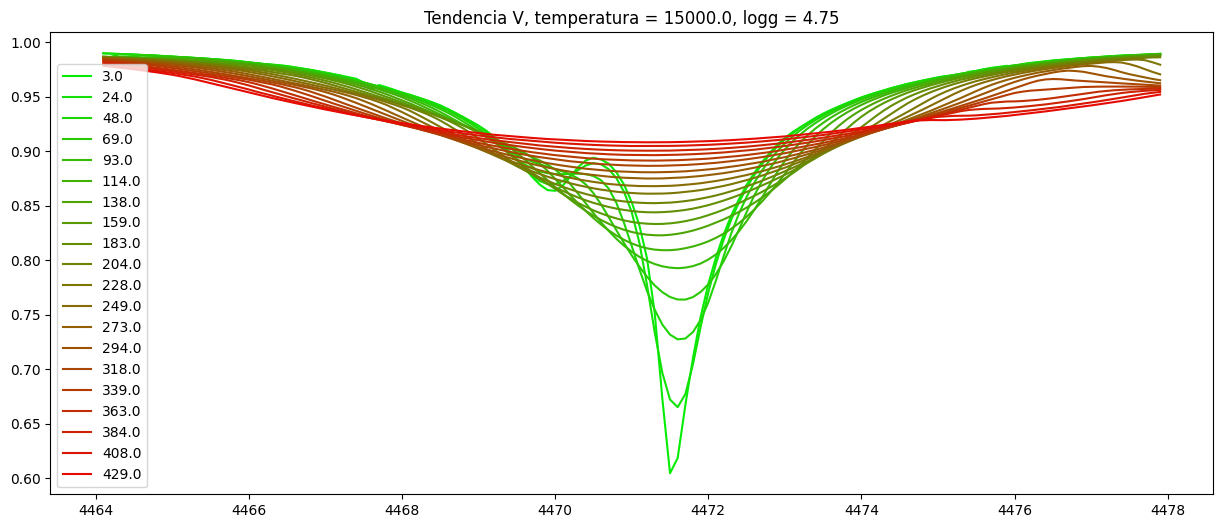

In [40]:
import math

g = g_list.max()
t = y[y.g == g].temperature.min()
matchingVs = y[(y.g == g) & (y.temperature == t)].v.unique()
matchingVs.sort()

color = get_color_gradient(blue,red,len(matchingVs))

plt.figure(figsize=(15,6))

n = 20
plotedVs = []

for i in [math.floor(j*len(matchingVs)/n) for j in range(n)]:
  value = matchingVs[i] 
  spectraIndex = y[(y.temperature == t) & (y.g == g) & (y.v == value)].index[0]
  tendencyLine(x.iloc[spectraIndex], str(int(value)),color[i])
  plotedVs.append(value)

plt.legend(plotedVs)
plt.title('Tendencia V, temperatura = '+ str(t) + ', logg = '+ str(g))
plt.show()

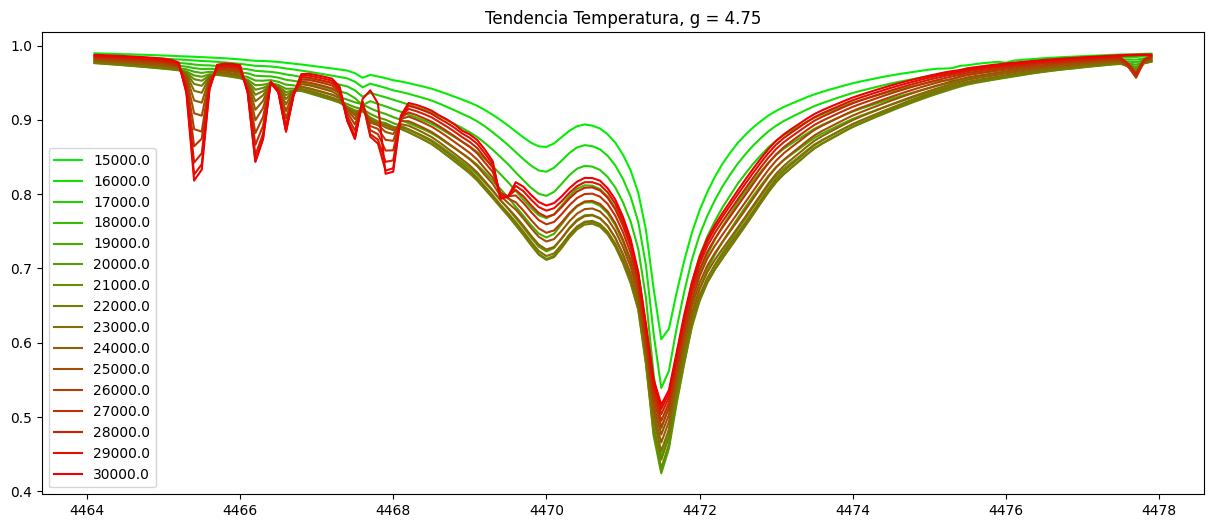

In [41]:
g = g_list[-1]
v = y[y.g == g].v.min()
matchingTemperatures = y[(y.g == g) & (y.v == v)].temperature.unique()

color = get_color_gradient(blue,red,len(matchingTemperatures))

plt.figure(figsize=(15,6))

for i,t in enumerate(matchingTemperatures):
  spectraIndex = y[(y.temperature == t) & (y.g == g) & (y.v == v)].index[0]
  tendencyLine(x.iloc[spectraIndex], str(int(t)),color[i])

plt.legend(matchingTemperatures)
plt.title('Tendencia Temperatura, g = '+ str(g))
plt.show()

## Save

In [42]:
df = B_df.drop(trimList,axis=1)
df.to_csv(path+'/Data/b_spectral_lines_trim.csv',index=False)

# O-Star

In [43]:
# dataframe setup
target = ['temperature','g','v']
x = O_df.drop(target,axis=1)
y = O_df[target]

# parametra values lists
t_list = y['temperature'].unique()
g_list = y['g'].unique()
v_list = y['v'].unique()

In [44]:
t = t_list[1]
v = y[y.temperature == t].v.min()
matchingGs = y[y.temperature == t].g.unique()

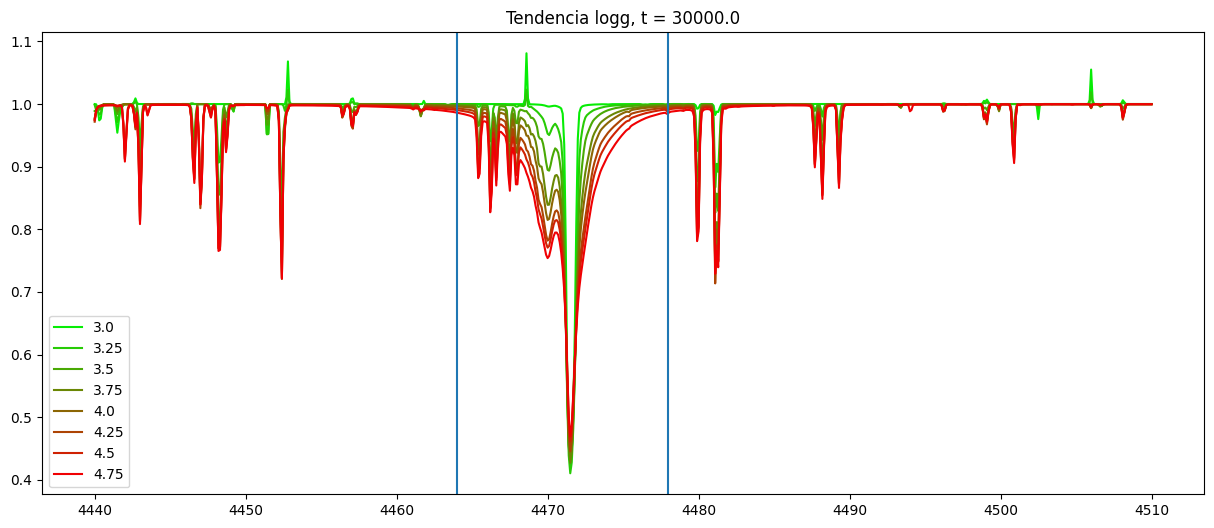

In [45]:
lower_bound = 4464
upper_bound = 4478
color = get_color_gradient(blue,red,len(matchingGs))

plt.figure(figsize=(15,6))

for i,g in enumerate(matchingGs):
  spectraIndex = y[(y.temperature == t) & (y.g == g) & (y.v == v)].index[0]
  tendencyLine(x.iloc[spectraIndex], str(int(t)),color[i])

plt.legend(matchingGs)
plt.title('Tendencia logg, t = '+str(t))
plt.axvline(x = lower_bound)
plt.axvline(x = upper_bound)
plt.show()

## Trim

In [46]:
trimList = []
for freq in x.columns:
  if float(freq) <= lower_bound or float(freq) >= upper_bound:
    trimList.append(freq)
x = x.drop(trimList,axis=1)

## Trim Result

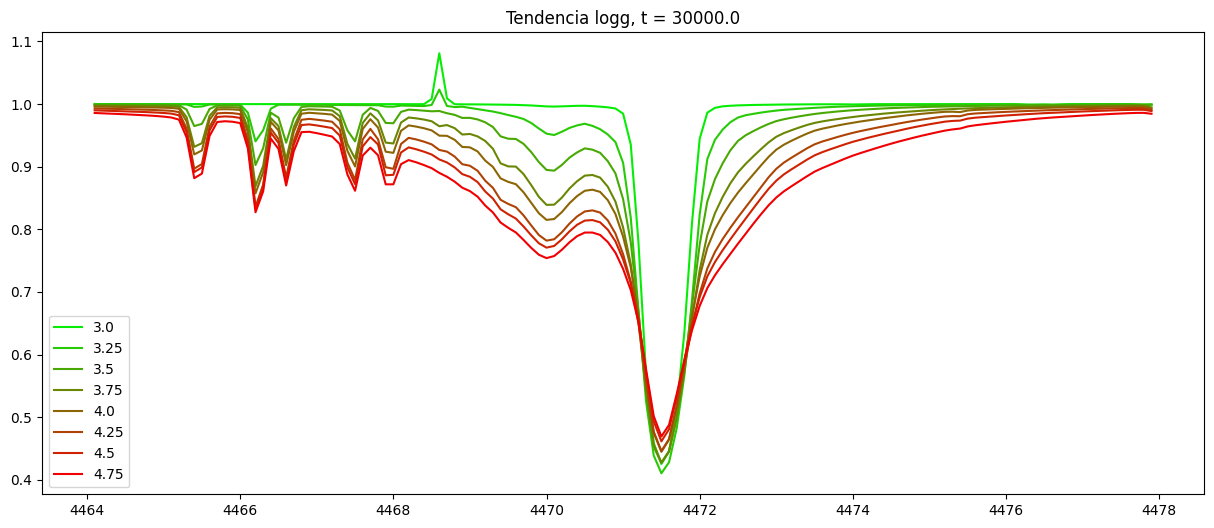

In [47]:
color = get_color_gradient(blue,red,len(matchingGs))

plt.figure(figsize=(15,6))

for i,g in enumerate(matchingGs):
  spectraIndex = y[(y.temperature == t) & (y.g == g) & (y.v == v)].index[0]
  tendencyLine(x.iloc[spectraIndex], str(int(t)),color[i])

plt.legend(matchingGs)
plt.title('Tendencia logg, t = '+str(t))
plt.show()

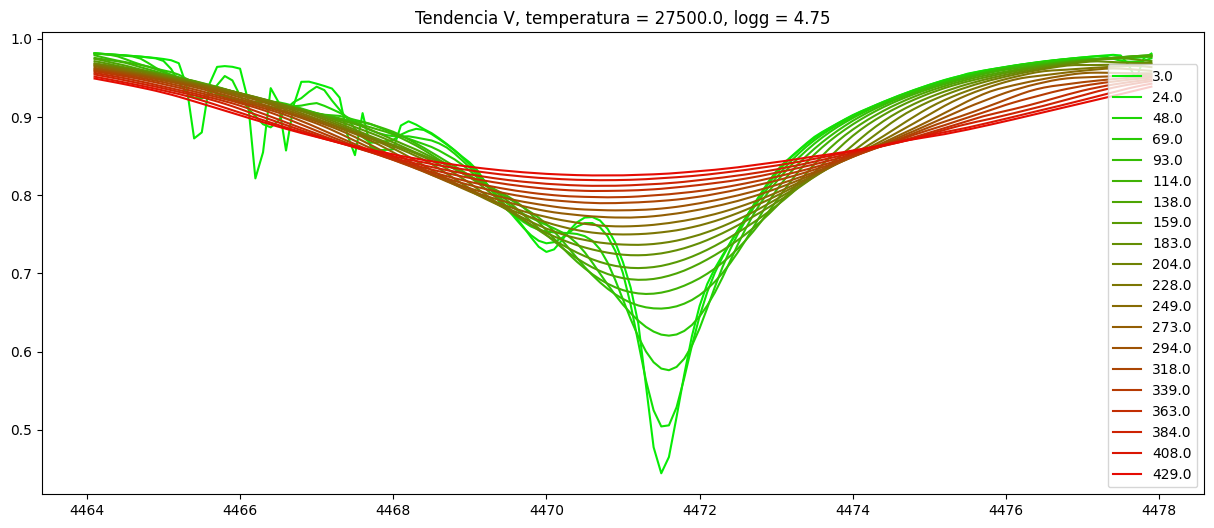

In [48]:
import math

g = g_list.max()
t = y[y.g == g].temperature.min()
matchingVs = y[(y.g == g) & (y.temperature == t)].v.unique()
matchingVs.sort()

color = get_color_gradient(blue,red,len(matchingVs))

plt.figure(figsize=(15,6))

n = 20
plotedVs = []

for i in [math.floor(j*len(matchingVs)/n) for j in range(n)]:
  value = matchingVs[i] 
  spectraIndex = y[(y.temperature == t) & (y.g == g) & (y.v == value)].index[0]
  tendencyLine(x.iloc[spectraIndex], str(int(value)),color[i])
  plotedVs.append(value)

plt.legend(plotedVs)
plt.title('Tendencia V, temperatura = '+ str(t) + ', logg = '+ str(g))
plt.show()

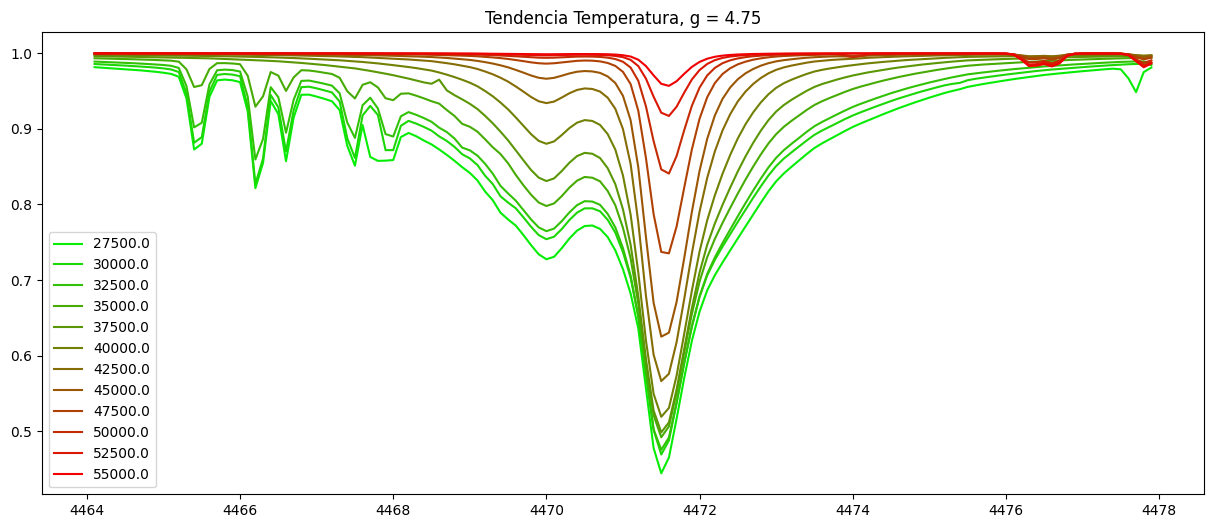

In [49]:
g = g_list[-1]
v = y[y.g == g].v.min()
matchingTemperatures = y[(y.g == g) & (y.v == v)].temperature.unique()

color = get_color_gradient(blue,red,len(matchingTemperatures))

plt.figure(figsize=(15,6))

for i,t in enumerate(matchingTemperatures):
  spectraIndex = y[(y.temperature == t) & (y.g == g) & (y.v == v)].index[0]
  tendencyLine(x.iloc[spectraIndex], str(int(t)),color[i])

plt.legend(matchingTemperatures)
plt.title('Tendencia Temperatura, g = '+ str(g))
plt.show()

## Save

In [50]:
df = B_df.drop(trimList,axis=1)
df.to_csv(path+'/Data/o_spectral_lines_trim_v2.csv',index=False)

# Real Spectra

In [60]:
# dataframe setup
target = ['temperature','g','v']
drop = ['temperature','g','v','HD','date','time']
aux = B_df.drop(target,axis=1)
x = Obs_df.drop(drop,axis=1)
y = Obs_df[target]

# parametra values lists
t_list = y['temperature'].unique()
g_list = y['g'].unique()
v_list = y['v'].unique()

In [61]:
trimList = []
for i, freq in enumerate(aux.columns):
  if float(freq) <= lower_bound or float(freq) >= upper_bound:
    trimList.append(x.columns[i])
x = x.drop(trimList,axis=1)

In [63]:
df = Obs_df.drop(trimList,axis=1)
df.to_csv(path+'/Data/observed_spectral_lines_trim_v2.csv',index=False)